In [40]:
# 📌 Segmentasi Pasar dengan K-Means Clustering
# Author: [Nama Anda]

# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [41]:
data = pd.read_csv('E-commerce Customer Behavior.csv')

df = pd.DataFrame(data)

In [42]:
# 3. EDA singkat
print("Preview Data:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Preview Data:
   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3 

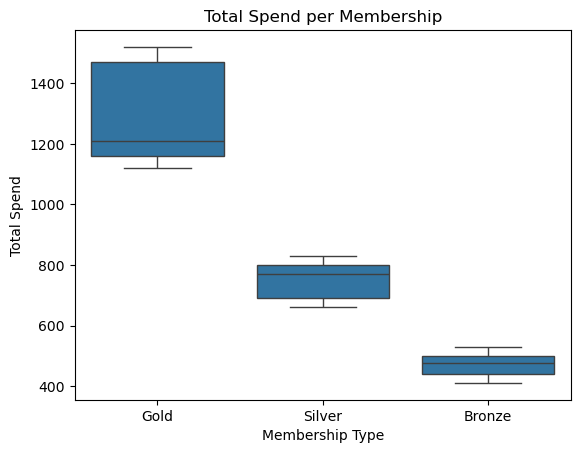

In [43]:
# Distribusi Total Spend per Membership
sns.boxplot(x="Membership Type", y="Total Spend", data=df)
plt.title("Total Spend per Membership")
plt.show()

In [44]:
# 4. Preprocessing
# Encode kategori
le_gender = LabelEncoder()
le_city = LabelEncoder()
le_member = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])      # Female=0, Male=1
df["City"] = le_city.fit_transform(df["City"])            # encode city
df["Membership Type"] = le_member.fit_transform(df["Membership Type"])  # Bronze=0, Gold=1, Silver=2

In [45]:
# Fitur untuk clustering
features = ["Age","Gender","City","Membership Type","Total Spend","Items Purchased","Average Rating","Discount Applied","Days Since Last Purchase"]

X = df[features]


In [46]:
# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\Ricki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ricki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ricki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ricki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

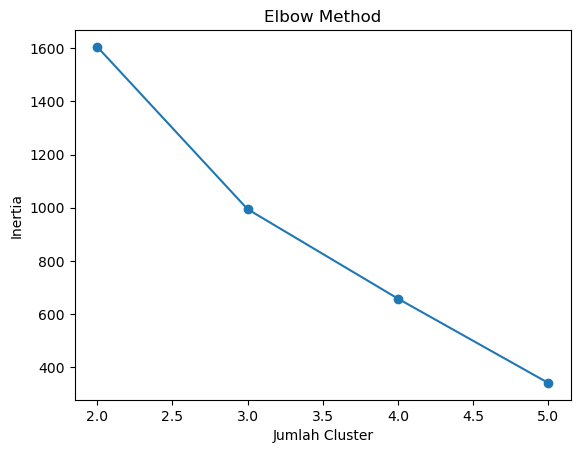

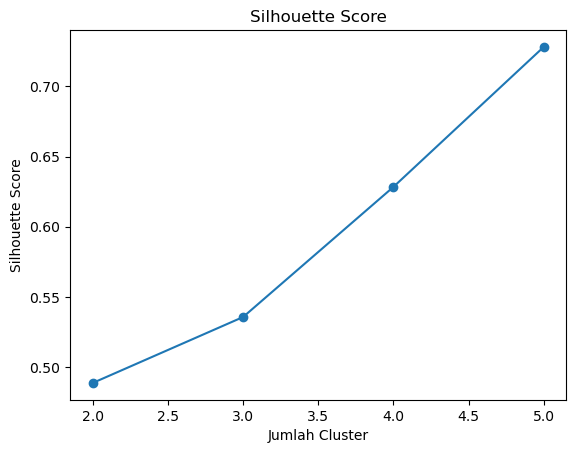

In [47]:
# 5. Menentukan jumlah cluster optimal (Elbow Method)
inertia = []
silhouette = []
K = range(2,6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(K, inertia, "o-")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

plt.plot(K, silhouette, "o-")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()


In [48]:
# 6. Clustering dengan K=3 (misalnya)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nCluster Summary:")
print(df.groupby("Cluster")[features].mean())


Cluster Summary:
               Age    Gender      City  Membership Type  Total Spend  \
Cluster                                                                
0        39.362069  0.000000  0.500000              0.0   473.388793   
1        29.923077  0.504274  4.495726              1.0  1311.144444   
2        31.555556  0.991453  2.495726              2.0   748.432479   

         Items Purchased  Average Rating  Discount Applied  \
Cluster                                                      
0               8.491379        3.325000          0.500000   
1              17.615385        4.675214          0.504274   
2              11.658120        4.051282          0.495726   

         Days Since Last Purchase  
Cluster                            
0                       31.612069  
1                       17.940171  
2                       30.256410  


c:\Users\Ricki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


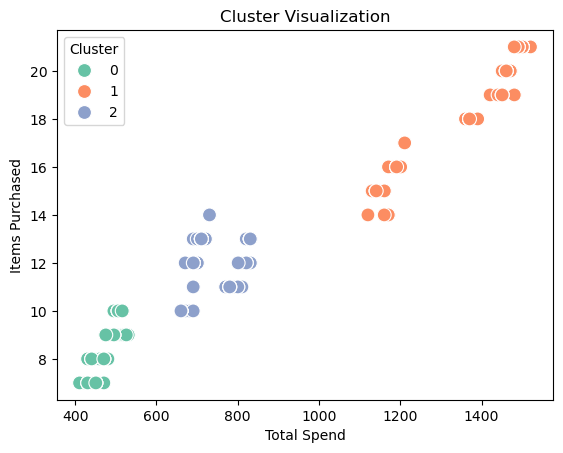

In [49]:
# 7. Visualisasi Cluster (Total Spend vs Items Purchased)
sns.scatterplot(x="Total Spend", y="Items Purchased", hue="Cluster", data=df, palette="Set2", s=100)
plt.title("Cluster Visualization")
plt.show()


In [50]:
# 8. Insight awal
for c in df["Cluster"].unique():
    segmen = df[df["Cluster"] == c]
    print(f"\n📌 Cluster {c}:")
    print(f"Jumlah customer: {len(segmen)}")
    print(segmen[["Customer ID","Membership Type","Total Spend","Items Purchased","Days Since Last Purchase"]])


📌 Cluster 1:
Jumlah customer: 117
     Customer ID  Membership Type  Total Spend  Items Purchased  \
0            101                1       1120.2               14   
3            104                1       1480.3               19   
6            107                1       1150.6               15   
9            110                1       1520.1               21   
12           113                1       1200.8               16   
..           ...              ...          ...              ...   
335          436                1       1200.8               16   
338          439                1       1460.5               20   
341          442                1       1140.6               15   
344          445                1       1480.1               21   
347          448                1       1190.8               16   

     Days Since Last Purchase  
0                          25  
3                          12  
6                          28  
9                           9  
